In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df_first = pd.read_csv("within_cost_high.csv")

In [3]:
df_second = pd.read_csv("within_cost_low.csv")

In [4]:
df_first.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df_second.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
feature_names = ['Ans_CommentCount','Words_in_Answer_Text','que_answer_ratio']
nrm_feature_names = [f"Nrm_{i}" for i in feature_names]

In [7]:
scaler = MinMaxScaler()
features = df_first[feature_names]
nrm_feature_names = [f"Nrm_{i}" for i in feature_names]
scaler.fit(features)
for i in nrm_feature_names:
    df_first[i] = 0
df_first[nrm_feature_names] = scaler.transform(features)
df_first["Sum_of_features"] = df_first[nrm_feature_names].sum(axis=1)

In [8]:
scaler = MinMaxScaler()
features = df_second[feature_names]
nrm_feature_names = [f"Nrm_{i}" for i in feature_names]
scaler.fit(features)
for i in nrm_feature_names:
    df_second[i] = 0
df_second[nrm_feature_names] = scaler.transform(features)
df_second["Sum_of_features"] = df_second[nrm_feature_names].sum(axis=1)

In [9]:
lower_quantile, upper_quantile = df_first["Sum_of_features"].quantile([.25, .75])

df_first_adjusted = df_first.loc[(df_first["Sum_of_features"] < lower_quantile)]

In [10]:
lower_quantile, upper_quantile = df_second["Sum_of_features"].quantile([.25, .75])

df_second_adjusted = df_second.loc[(df_second["Sum_of_features"] > upper_quantile)]

In [11]:
lower_quantile, upper_quantile = df_first["Sum_of_features"].quantile([.25, .75])

df_first_adjusted_new = df_first.loc[(df_first["Sum_of_features"] > upper_quantile)]

In [12]:
lower_quantile, upper_quantile = df_second["Sum_of_features"].quantile([.25, .75])

df_second_adjusted_new = df_second.loc[(df_second["Sum_of_features"] < lower_quantile)]

c:\users\abim\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\abim\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sum_of_features', ylabel='Density'>

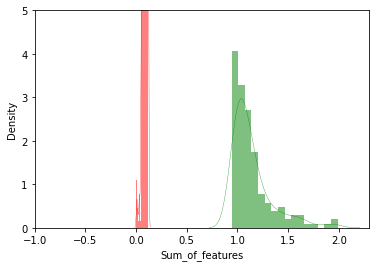

In [13]:
plt.xlim(-1,2.3)
plt.ylim(0,5)

kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':0.3})

sns.distplot(df_first_adjusted["Sum_of_features"],color="red", **kwargs)
sns.distplot(df_second_adjusted["Sum_of_features"],color="green", **kwargs)

c:\users\abim\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\abim\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sum_of_features', ylabel='Density'>

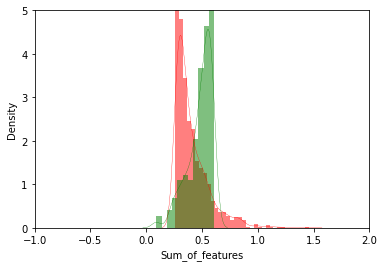

In [14]:
plt.xlim(-1,2)
plt.ylim(0,5)

kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':0.3})

sns.distplot(df_first_adjusted_new["Sum_of_features"],color="red", **kwargs)
sns.distplot(df_second_adjusted_new["Sum_of_features"],color="green", **kwargs)